# Ejercicio 3: Interpolación

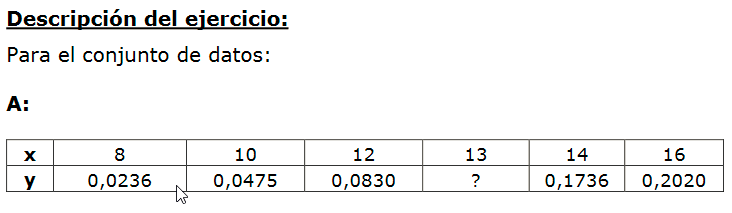

# Paso 1 Definimos Entradas Newton
 
---



In [6]:
import matplotlib.pyplot as plt      # Importamos libreria para graficar                                         
import numpy as np                                                              
x = [8, 10, 12, 14, 16]                   # Valores de x                                     
y = [0.02236, 0.0475, 0.0830, 0.1736, 0.2020]            # Valores de y                                            
x_inter = 13                                               # Valor interpolación                 
# x_inter = float(input("Ingrese el valor de x donde se desee interporlar"))


# Paso 2 Definir la interpolación

In [7]:
def InterpolacionNewton (x, y, x_inter):           # Definimos la función de interpolación de Newton                 
  n = len(x)                                                      
 
  dfd = [[None for x in range(n)]  for x in range(n)]       # definimos la matriz vacia       
  yint = [None for x in range(n)]                            #  creamos el vector vacio

  for i in  range(n):                                            # recorremos la matriz de i hasta n  
    dfd[i][0] = y[i]                                   

  for j in range(1,n):                                              #Recorremos la primera columna
    for i in range(n-j):                                            
      dfd[i][j] = (dfd[i+1][j-1] - dfd[i][j-1]) / (x[i+j] - x[i])    # operación de la diferencia

  yint[0]  = dfd[0][0]                                              
  xterm = 1                                                        

  for k in range(1,n):                                      # recorremos el contador        
    xterm = xterm * (x_inter - x[k-1])   
    y_inter = yint[k-1] + dfd[0] [k] * xterm                        
    yint[k] = y_inter                                                                        

  return y_inter                           

# Paso 3 Llamar Función Para Interpolar 

In [8]:
fxn = print(InterpolacionNewton(x, y, x_inter))  # imprimir resultado

0.12494593750000002


#Paso 4 Grafica del Polinomio

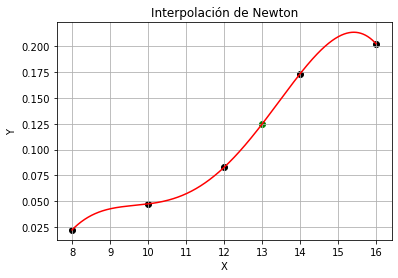

In [13]:
x_v = np.arange(min(x), max(x), 0.01)                     #Función para cada valor de x          
y_v = []                                                    # lista Vacia        

for i in range(len(x_v)):                                       # Recorremos los valores de x      
  y_grafica = InterpolacionNewton(x, y, x_v[i])                    
  y_v.append(y_grafica)                                            
                                       
fxn = InterpolacionNewton (x, y, x_inter)

plt.scatter(x, y, color="black")  # Se grafica la función
plt.xlabel("X")                                   
plt.ylabel("Y")
plt.title("Interpolación de Newton")
plt.grid(True)
plt.plot(x_v, y_v,'r')
plt.scatter(x_inter, fxn, color='g')


 # Interpolación de Lagrange
 # Paso 5  Definir Entradas

In [14]:
import matplotlib.pyplot as plt             
import numpy as np
x = [8, 10, 12, 14, 16]                                                       
y = [0.02236, 0.0475, 0.0830, 0.1736, 0.2020]                                                        
x_inter = 13       


# Paso 6 Función de interpolación de Lagrange

In [15]:
def InterpolacionLagrange(x, y, x_inter):                           
  n = len(x)                                                        
  suma = 0                                                          

  for i in  range(n):                                               
    producto = y[i]                                                 
    for j in  range(n):                                             
      if i !=j:                                                     
       producto = producto * (x_inter - x[j]) / (x[i] - x[j])       

    suma = suma + producto                                          
  y_inter = suma
  
  return y_inter                      

# Paso 6 Función para interpolar

In [16]:
fxn = print(InterpolacionLagrange(x, y, x_inter))  

0.1249459375


Paso 7 Generar Grafica

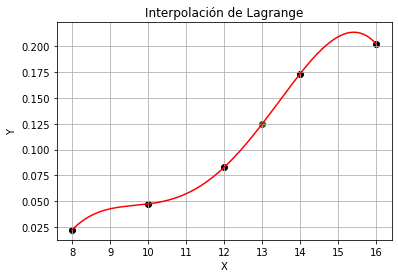

In [17]:
x_v = np.arange(min(x), max(x), 0.01)                               
y_v = []                                                            

for i in range(len(x_v)):                                               
  y_grafica = InterpolacionLagrange(x, y, x_v[i])                    
  y_v.append(y_grafica)                                             
                                       
fxn = InterpolacionLagrange (x, y, x_inter)

plt.scatter(x, y, color="black")  
plt.xlabel("X")                                   
plt.ylabel("Y")
plt.title("Interpolación de Lagrange")
plt.grid(True)
plt.plot(x_v, y_v,'r')
plt.scatter(x_inter, fxn, color='g')

# Interpolación con Trazadores Cúbicos
# Paso 7 Definimos Entradas

In [65]:
import numpy as np
import sympy as sym
import pandas as pd
import matplotlib.pyplot as plt                                                           

x = [8, 10, 12, 14, 16]                                                       
y = [0.02236, 0.0475, 0.0830, 0.1736, 0.2020]                                                        
x_inter = 13                                                                             
n = len(x)

h = np.zeros([n- 1])                                                                       
A = np.zeros([n- 2, n- 2]); B = np.zeros([n - 2]); S= np.zeros([n])
a = np.zeros([n- 1]); b = np.zeros([n - 1]); c = np.zeros([n - 1]); d = np.zeros([n - 1])


#Paso 8 Función Interpolación Por Trazadores Cúbicos

In [66]:
def InterpolacionTrazados(x, y, x_inter, n, h, A, a):
  if n<3:
    T=[]

  for i in range(n - 1):
      h[i] = x[i + 1] - x[i]
  A[0, 0] = 2 * (h[0] + h[1])
  A[0, 1] = h[1]
  B[0] = 6 *((y[2] - y[1]) / h[1] - (y[i] - y[0])/ h[0])
  for i in range(1, n-3):
      A[i, i - 1] = h[i]
      A[i, i] = 2 * (h[i + 1])
      A[i, i + 1] = h[i + 1]
      B[i] = 6 * ((y[i + 2] - y[i + 1]) / h[i + 1] - (y[i + 1] - y[i]) / h[i])
  A[n - 3, n - 4] = h[n - 3]
  A[n - 3, n - 3] = 2 * (h[n - 3] + h[n - 2])
  B[n - 3] = 6 * ((y[n -1] - y[n - 2]) / h[n - 2] - (y[n - 2] - y[n - 3]) / h[n -3])
  r = np.linalg.solve(A, B)

  for i in range(1, n-1):
    S[i] = r[i-1]
  S[0]=0
  S[n-1]=0

  for i in range(n-1):
      a[i] =(S[i+1]-S[i])/(6*h[i])
      b[i] = S[i]/2
      c[i] = (y[i+1]-y[i])/h[i]-(2*h[i]*S[i]+h[i]*S[i+1])/6
      d[i] = y[i]

  try:
    if len(x_inter) == 0:
        pass
  
  except TypeError:
       x_inter = [x_inter]
  
  if len(x_inter) == 0:
      t =Symbol('t')
      T = []
      for i in range(n - 1):
          p=expand(a[i]*(t -x[i])**3 +b[i]*(t-x[i])**2+c[i]*(t-x[i])+d[i])
          T=T+[p]

  else:
      m = len(x_inter)
      y_inter = np.zeros([m])
      for k in range(m):
          t = x_inter[k]
          for i in range(n - 1):
              if t >= x[i] and t <= x[i + 1]:
                   y_inter[k] = a[i] * (t - x[i]) ** 3 + b[i] * (t - x[i]) ** 2 + c[i] * (t - x[i]) + d[i]

          if m > 2:
             k = m - 1
             i = n - 2
             y_inter[k] = a[i] * (t - x[i]) ** 3 + b[i] * (t - x[i]) ** 2 + c[i] * (t - x[i]) + d[i]

  return y_inter 

Paso 9 Función para Interpolar

In [67]:
fx = print(InterpolacionTrazados(x, y, x_inter, n, h, A, a))

[0.11545906]


#Paso 10 Generar Grafica

Text(0.5, 1.0, 'Trazados Cúbicos')

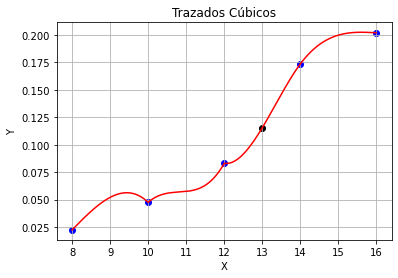

In [73]:
x_v =np.arange(min(x),max(x), 0.01)

y_v =[]
for i in range(len(x_v)):
  y_grafica = InterpolacionTrazados(x, y, x_v[i], n, h, A,a)
  y_v.append(y_grafica)

fx = InterpolacionTrazados(x, y, x_inter, n, h, A, a)

plt.scatter(x,y, color="blue")
plt.scatter(x_inter,fx,color='black')
plt.xlabel("X")
plt.ylabel("Y")
plt.plot(x_v,y_v, 'r')
plt.grid(True)
plt.title("Trazados Cúbicos")


# Analis de Rsultados 
Interpolación significa estimar el valor desconocido de una función en un punto, tomando una medida ponderada de sus valores conocidos en puntos cercanos al valor

Se realizo la interpolación de los metodos de Newton, lagrange y trazados Cúbicos con un resultado exitoso

# Bibligrafia 
https://www.youtube.com/watch?v=zAIwver4M9g